In [1]:
import numpy as np
from dataclasses import dataclass
import matplotlib.pyplot as plt
from typing import Callable


# Generate Synthetic Data

[4.49671415 4.0637559  5.05172894 6.12909046 4.57392743]
[[0.       ]
 [0.1010101]
 [0.2020202]
 [0.3030303]
 [0.4040404]]
Shapes (100, 1) (100,)


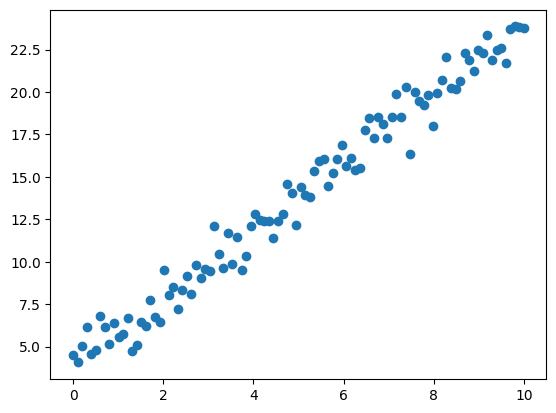

In [2]:
np.random.seed(42)
x_values = np.linspace(0, 10, 100)
def generate_y_valyes(x: np.array, epsilon: int = 1) -> np.array:
    # add some noise
    return 2 * x + 5 + np.random.normal(-epsilon, epsilon, x.shape)

y_true = generate_y_valyes(x_values)
print(y_true[:5])
X = x_values.reshape(-1, 1)
plt.scatter(x_values, y_true)
print(X[:5])
print("Shapes", X.shape, y_true.shape)

# Prepare the Data && Initialize Parameters

In [3]:
from dataclasses import field
from typing import List


@dataclass
class LinearRegressionModel:
    bias: float
    x: np.ndarray
    learning_rate: float
    loss_function: Callable
    losses: List = field(default_factory=list) 

    def __post_init__(self):
        self.x = np.insert(self.x,0,1, axis=1)
        self.weights = np.array([self.bias, 0])

    def predict(self, xi) -> np.ndarray:
        return self.weights.T @ xi
    
    def update_weights(self, y_true: np.ndarray):
        y_pred = np.apply_along_axis(self.predict,axis=1,arr=self.x )
        gradient = ((2/self.x.shape[0]) * self.x.T) @ (y_pred-y_true).flatten()
        self.weights = self.weights - self.learning_rate * gradient
        self.losses.append(mean_squared_error(y_true, y_pred))
        
    
def mean_squared_error(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.mean((y_pred - y_true) ** 2)




In [5]:
linear_regression_model = LinearRegressionModel(bias=0, x=X, learning_rate=2e-2, loss_function=mean_squared_error)
for step in range(0,100_000):
    linear_regression_model.update_weights(y_true)
print(linear_regression_model.weights)



[3.82718715 2.01379327]


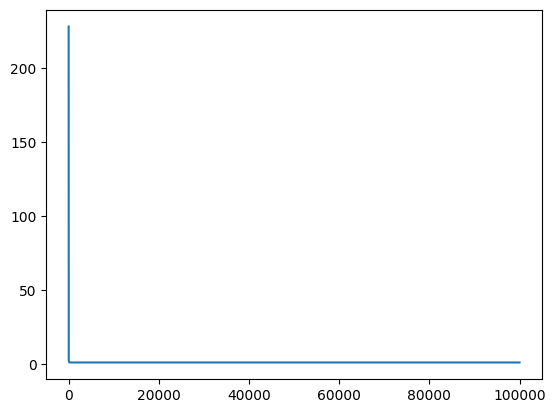

In [6]:
plt.plot(linear_regression_model.losses)

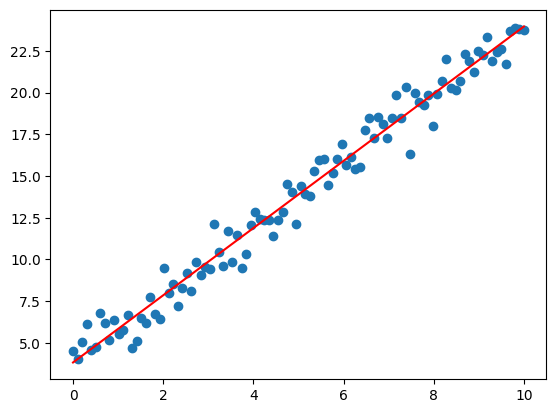

In [7]:
plt.scatter(x_values, y_true)
plt.plot(x_values, linear_regression_model.weights[1] * x_values + linear_regression_model.weights[0], color='red')